In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
%matplotlib inline

In [185]:
# spectrum in units of angstrom, and ergs/s/cm^2/Ang
gw_ang, gw_f_lam = np.genfromtxt('../data/spectrum-at-0p49.csv', delimiter=',',unpack=True)

# tess bandpass in nm and QE
tess_nm, tess_qe = np.genfromtxt('../data/tess-bandpass.csv', delimiter=',',unpack=True)
tess_ang = tess_nm * 10

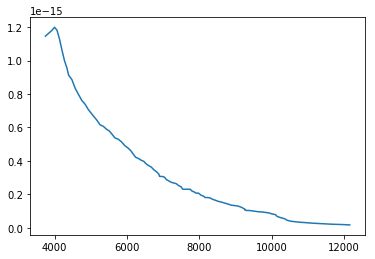

In [186]:
plt.plot(gw_ang, gw_f_lam)

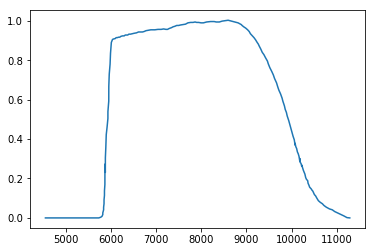

In [187]:
plt.plot(tess_ang, tess_qe)

In [188]:
# convolve with tess bandpass
f2 = interp1d(tess_ang, tess_qe, kind='slinear', bounds_error=False, fill_value=0 )
tess_qe_interp = f2(gw_ang, )

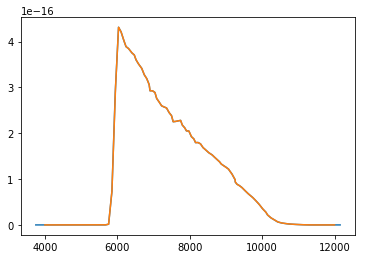

In [189]:
# multiple gw event with tess bandpass
gw_f_lam_tess = tess_qe_interp * gw_f_lam

plt.plot(gw_ang, gw_f_lam_tess)
f3 = interp1d(gw_ang, gw_f_lam_tess, kind='slinear', bounds_error=False, fill_value=0 )
x = np.arange(4000,12000,1)
y = f3(x)
plt.plot(x,y)

In [190]:
gw_f_nu_tess = 3.34E4 * x**2 *y

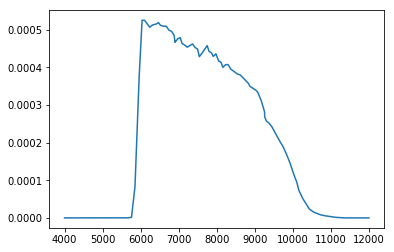

In [191]:
plt.plot(x, gw_f_nu_tess)

In [192]:
# calculate the integral we need to get Jansky
f4 = interp1d(x, gw_f_nu_tess, kind='slinear', bounds_error=False, fill_value=0 )
print(integrate.quad(f4, 4000,12000, limit=500))
print(integrate.quad(f2, 4000,12000, limit=500))

/Users/tom/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


(1.653049801458334, 1.75939340169803e-05)
(3901.9848899925937, 0.2313390798013525)


In [193]:
1.653 / (3901.9848899925937 * 3631)

1.1667048986740331e-07

In [194]:
# get TESS band magntude using the AB formula
m = -(5/2) * np.log10(1.1667048986740331e-07)
print(m)

17.3325974466


In [195]:
# get absolute mag
absM = m - 5*(np.log10(40E6)-1)

In [196]:
a = np.random.uniform(-0.5,0.5,size=1540*10) * 1.E9
b = np.random.uniform(-0.5,0.5,size=1540*10) * 1.E9
c = np.random.uniform(-0.5,0.5,size=1540*10) * 1.E9

In [197]:
distances = np.sqrt(a**2 + b**2 + c**2)

In [198]:
tmags = absM + 5*(np.log10(distances)-1)

In [199]:
tmags[tmags < 19.5].shape[0]  

78